In [1]:

import pandas as pd
import numpy as np

from scipy import stats
import math


import matplotlib.pyplot as plt
from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager

from adjustText import adjust_text

In [2]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\WyScout\League 1\FullBacks.csv')

In [3]:
df.head()

,Player,Team,Defensive actions,Defensive duels,Aerial duels,Sliding tackles,Shots blocked,Interceptions,Fouls,Yellow cards,Attacking actions,Assists,Crosses,Dribbles,Touches in box,Progressive runs,Passes,Key passes
0,C. Burgess,Accrington Stanley,13.45,8.26,11.07,0.84,0.48,7.53,1.41,0.22,1.08,0.04,1.69,0.45,1.08,0.84,38.17,0.17
1,H. Rodgers,Accrington Stanley,9.69,6.46,6.75,0.76,0.40,4.90,0.87,0.22,1.23,0.04,1.20,0.84,1.20,0.65,22.58,0.29
2,L. O'Neill,AFC Wimbledon,10.46,6.56,5.40,0.77,0.43,6.00,1.16,0.09,3.81,0.17,5.06,1.50,0.26,0.86,39.30,0.73
3,S. McLoughlin,AFC Wimbledon,11.01,7.95,2.95,0.48,0.07,5.93,0.55,0.22,2.32,0.11,2.76,2.32,1.55,1.58,28.91,0.52
4,D. Johnson,AFC Wimbledon,9.87,5.48,6.76,0.28,0.66,5.81,0.66,0.05,1.61,0.05,0.61,1.70,0.94,0.94,40.82,0.14


In [4]:
#Create a parameter list
params = list(df.columns)
params

['Player',
 'Team',
 'Defensive actions ',
 'Defensive duels ',
 'Aerial duels ',
 'Sliding tackles ',
 'Shots blocked ',
 'Interceptions',
 'Fouls',
 'Yellow cards ',
 'Attacking actions ',
 'Assists ',
 'Crosses',
 'Dribbles ',
 'Touches in box ',
 'Progressive runs ',
 'Passes',
 'Key passes ']

In [5]:
#drop the first 3 list item becuase we will not be using player,index, or 90s as a comparison metric
params = params[2:]
params

['Defensive actions ',
 'Defensive duels ',
 'Aerial duels ',
 'Sliding tackles ',
 'Shots blocked ',
 'Interceptions',
 'Fouls',
 'Yellow cards ',
 'Attacking actions ',
 'Assists ',
 'Crosses',
 'Dribbles ',
 'Touches in box ',
 'Progressive runs ',
 'Passes',
 'Key passes ']

In [6]:
df.Player.values

array(['C. Burgess', 'H. Rodgers', "L. O'Neill", 'S. McLoughlin',
       'D. Johnson', 'N. Guinness-Walker', 'C. Alexander', 'Z. Medley',
       'S. Seddon', 'J. Husband', 'O. Turton', 'L. Garbutt',
       'D. Mitchell', 'L. Leahy', 'G. Williams', 'M. Ehmer', 'J. Hare',
       'C. Daniel', 'T. Hamer', 'S. Clare', 'J. Brayford', 'P. Ng',
       'B. Purrington', 'I. Maatsen', 'A. Matthews', 'C. Gunter',
       'R. Adebisi', 'L. Offord', 'H. Pickering', 'J. Wright',
       'B. Halliday', 'C. John', 'R. James', 'W. Burns', 'D. Andrew',
       'C. Ogilvie', 'R. McKenzie', "T. O'Connor", 'R. Jackson',
       'L. Coyle', 'C. Elder', 'J. Emmanuel', 'L. Woolfenden',
       'J. Donacien', 'S. Ward', 'M. Kenlock', 'L. Chambers',
       'C. Bramall', 'A. Edun', 'R. Poole', 'M. Harriman', 'J. Mills',
       'P. Kioso', 'J. Lawrence-Gabriel', 'J. Ruffels', 'S. Long',
       'J. Hanson', 'A. Forde', 'D. Butler', 'N. Thompson', 'J. Edwards',
       'C. Johnson', 'L. Brown', 'C. Daniels', 'J. Keohane',

In [7]:
# The player needs to be spelled exactly the same way as it is in the data. Accents and everything.
player = df.loc[df['Player']=="Average"].reset_index()
player = list(player.loc[0])
print(player)

[86, 'Average', 'Sunderland', 7.67, 6.13, 3.33, 0.57, 0.15, 3.41, 0.95, 0.12, 3.15, 0.06, 3.26, 2.41, 1.11, 1.82, 44.89, 0.37]


In [8]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

16
19 None
16
16 None


In [9]:
player

[7.67,
 6.13,
 3.33,
 0.57,
 0.15,
 3.41,
 0.95,
 0.12,
 3.15,
 0.06,
 3.26,
 2.41,
 1.11,
 1.82,
 44.89,
 0.37]

In [10]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [11]:
round(stats.percentileofscore(df[params[0]],player[0]))

14

In [12]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [13]:
df.Player.values

array(['C. Burgess', 'H. Rodgers', "L. O'Neill", 'S. McLoughlin',
       'D. Johnson', 'N. Guinness-Walker', 'C. Alexander', 'Z. Medley',
       'S. Seddon', 'J. Husband', 'O. Turton', 'L. Garbutt',
       'D. Mitchell', 'L. Leahy', 'G. Williams', 'M. Ehmer', 'J. Hare',
       'C. Daniel', 'T. Hamer', 'S. Clare', 'J. Brayford', 'P. Ng',
       'B. Purrington', 'I. Maatsen', 'A. Matthews', 'C. Gunter',
       'R. Adebisi', 'L. Offord', 'H. Pickering', 'J. Wright',
       'B. Halliday', 'C. John', 'R. James', 'W. Burns', 'D. Andrew',
       'C. Ogilvie', 'R. McKenzie', "T. O'Connor", 'R. Jackson',
       'L. Coyle', 'C. Elder', 'J. Emmanuel', 'L. Woolfenden',
       'J. Donacien', 'S. Ward', 'M. Kenlock', 'L. Chambers',
       'C. Bramall', 'A. Edun', 'R. Poole', 'M. Harriman', 'J. Mills',
       'P. Kioso', 'J. Lawrence-Gabriel', 'J. Ruffels', 'S. Long',
       'J. Hanson', 'A. Forde', 'D. Butler', 'N. Thompson', 'J. Edwards',
       'C. Johnson', 'L. Brown', 'C. Daniels', 'J. Keohane',

In [14]:
player1 = df.loc[df['Player']=="J. Key"].reset_index()
player1 = list(player1.loc[0])
print(player1)

[85, 'J. Key', 'Exeter City', 10.68, 8.07, 6.47, 0.13, 0.13, 5.66, 0.72, 0.05, 4.16, 0.13, 2.77, 5.48, 1.78, 8.9, 39.05, 0.44]


In [15]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player1),print(len(params)))
player1 = player1[3:]
print(len(player1),print(len(params)))

16
19 None
16
16 None


In [16]:
player1

[10.68,
 8.07,
 6.47,
 0.13,
 0.13,
 5.66,
 0.72,
 0.05,
 4.16,
 0.13,
 2.77,
 5.48,
 1.78,
 8.9,
 39.05,
 0.44]

In [17]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values_2 = []
for x in range(len(params)):   
    values_2.append(math.floor(stats.percentileofscore(df[params[x]],player1[x])))

In [18]:
round(stats.percentileofscore(df[params[0]],player1[0]))

83

In [19]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

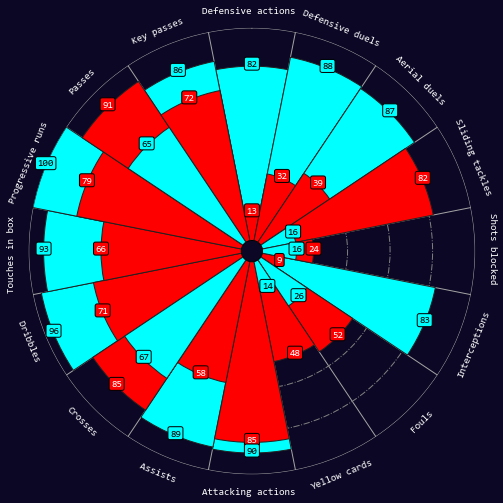

In [23]:
params = params
values = values
values_2 = values_2
font = 'consolas'



# pass True in that parameter-index whose values are to be adjusted
# here True values are passed for "\nTouches\nper Turnover" and "pAdj\nPress Regains" params
params_offset = [
    False, False, False, False, False, False, False, False,
    False, False, False, False, False, False, False, False
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#0B0725",     # background color
    straight_line_color="#A3A3A3",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#A3A3A3",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(8, 8.5),           # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#FF0000",    # Player One
        edgecolor="#222222",   
        zorder=2, linewidth=1
    ),                     
    kwargs_compare=dict(
        facecolor="#00FFFF",    # Player Two
        edgecolor="#222222", 
        zorder=2, 
        linewidth=1,
    ),
    kwargs_params=dict(
        color="#FFFFFF", 
        fontsize=12, 
        font='consolas',
        va="center"
    ),                          
    kwargs_values=dict(         #Player One
        color="#FFFFFF", 
        fontsize=14, 
        font='consolas',
        zorder=3,
        bbox=dict(
            edgecolor="#000000",
            facecolor="#FF0000",  # Colour Player One
            boxstyle="round,pad=0.2", lw=1
        )
    ),                         
    kwargs_compare_values=dict( #Player Two
        color="#000000", 
        fontsize=14, 
        zorder=3,
        font='consolas',
        bbox=dict(
            edgecolor="#000000",
            facecolor="#00FFFF", # Colour Player Two
            boxstyle="round,pad=0.2", lw=1) 
    ),                          
)


# adjust text for comparison-values-text
baker.adjust_texts(params_offset, offset=-0.17, adj_comp_values=True)

plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')